In [1]:
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator
import scipy.signal
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col = 0)
print(dataset.columns.values)

['runstring' 't_final_short' 'Rel_Eerr_short' 'avg_beta12' 'std_beta12'
 'min_beta12' 'max_beta12' 'avg_beta23' 'std_beta23' 'min_beta23'
 'max_beta23' 'avg_a1' 'std_a1' 'max_a1' 'min_a1' 'norm_std_a1'
 'norm_max_a1' 'norm_std_window10_a1' 'norm_max_window10_a1' 'avg_e1'
 'std_e1' 'max_e1' 'min_e1' 'norm_std_e1' 'norm_max_e1'
 'norm_std_window10_e1' 'norm_max_window10_e1' 'avg_inc1' 'std_inc1'
 'max_inc1' 'min_inc1' 'norm_std_inc1' 'norm_max_inc1'
 'norm_std_window10_inc1' 'norm_max_window10_inc1' 'avg_eH1' 'std_eH1'
 'max_eH1' 'min_eH1' 'avg_iH1' 'std_iH1' 'max_iH1' 'min_iH1' 'avg_ecross1'
 'std_ecross1' 'max_ecross1' 'min_ecross1' 'norm_a1_slope' 'avg_a2'
 'std_a2' 'max_a2' 'min_a2' 'norm_std_a2' 'norm_max_a2'
 'norm_std_window10_a2' 'norm_max_window10_a2' 'avg_e2' 'std_e2' 'max_e2'
 'min_e2' 'norm_std_e2' 'norm_max_e2' 'norm_std_window10_e2'
 'norm_max_window10_e2' 'avg_inc2' 'std_inc2' 'max_inc2' 'min_inc2'
 'norm_std_inc2' 'norm_max_inc2' 'norm_std_window10_inc2'
 'norm_max_window

In [3]:
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['avg_beta12','std_beta12','min_beta12','max_beta12','avg_beta23','std_beta23','min_beta23','max_beta23'] 
y = dataset['Stable']
X = dataset[features]
X.head()

,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,norm_max_window10_a2,...,norm_a2_slope,norm_a3_slope,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23
0,0.396282,0.481704,0.000329,0.001083,0.000214,0.000456,0.000701,0.001978,0.000446,0.000964,...,2.144832e-10,2.681898e-11,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,16.019985
1,1.034575,0.823935,0.000739,0.002137,0.000202,0.000463,0.000200,0.000350,0.000226,0.000377,...,3.559377e-11,-9.314702e-11,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,15.368196
2,0.440470,0.491261,0.001951,0.003550,0.001735,0.002860,0.002303,0.004034,0.002080,0.003409,...,-3.330088e-11,-4.095504e-11,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,25.351948
3,0.432098,0.550624,0.000026,0.000120,0.000005,0.000009,0.000019,0.000050,0.000016,0.000041,...,7.816527e-13,-7.257099e-12,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,19.156777
4,5.722053,17.442426,0.028284,0.063028,0.004313,0.010716,0.038832,0.160685,0.090892,0.112168,...,3.913858e-08,-2.610208e-08,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,4.156005


In [27]:
X.shape

(24999, 37)

In [4]:
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]
xgbc = XGBClassifier(seed = 0)

In [5]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [6]:
space ={
        'max_depth': hp.randint('x_max_depth',  20),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.8, 1),
        'scale_pos_weight': hp.uniform("x_pos_weight", 1, 15),
        "learning_rate":hp.uniform("x_learning_rate",0.01,0.2),
        'colsample_bytree': hp.uniform ('x_tree_colsample', 0.5,1),
}

dtrain = xgb.DMatrix(trainX, trainY)
dtest = xgb.DMatrix(testX, testY)
def objective(space):

    clf = XGBClassifier(n_estimators = 100, 
                            max_depth = space['max_depth'], 
                            min_child_weight =space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree =space['colsample_bytree'],
                            learning_rate = space['learning_rate'], seed = 0)
    
    params = clf.get_xgb_params()
    #dtest
    score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", early_stopping_rounds=10)
    #print score
    #score = cross_val_score(clf, trainX, trainY, cv = 5, scoring="average_precision")
    avg_score =  np.mean(score["test-auc-mean"])
    error = np.mean(score["test-auc-std"])
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dtest)
    test_score = metrics.roc_auc_score(testY, preds)
    
    print("SCORE:", avg_score, "ERROR", error, "HOLDOUT SCORE", test_score)

    return{'loss':1-test_score, 'status': STATUS_OK, "cv_score":avg_score , "cv_error":error, "holdout":test_score }

In [7]:
%%time
trials = Trials()
#import time
#start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 50, trials = trials)
#end = time.time()
#print("Optimization Time: %f seconds", (end  -start))

('SCORE:', 0.97221832000000019, 'ERROR', 0.001080851188921425, 'HOLDOUT SCORE', 0.98031053416373448)
('SCORE:', 0.97095432000000026, 'ERROR', 0.0019079383367278219, 'HOLDOUT SCORE', 0.97804672523085046)
('SCORE:', 0.9717867, 'ERROR', 0.00081387524599429528, 'HOLDOUT SCORE', 0.98118418797196194)
('SCORE:', 0.96170946000000002, 'ERROR', 0.0017171558950163251, 'HOLDOUT SCORE', 0.97130137721955223)
('SCORE:', 0.97255205999999994, 'ERROR', 0.0013683460744315357, 'HOLDOUT SCORE', 0.97993612307158173)
('SCORE:', 0.95886036000000008, 'ERROR', 0.0018177886863967913, 'HOLDOUT SCORE', 0.97243064262817314)
('SCORE:', 0.97304224000000006, 'ERROR', 0.00099733332959203638, 'HOLDOUT SCORE', 0.98151134736217371)
('SCORE:', 0.97168723999999995, 'ERROR', 0.0015036999705378346, 'HOLDOUT SCORE', 0.97967154705255788)
('SCORE:', 0.97252242, 'ERROR', 0.0010323248628670652, 'HOLDOUT SCORE', 0.98177701251617155)
('SCORE:', 0.96416114000000008, 'ERROR', 0.0017468384335053704, 'HOLDOUT SCORE', 0.97630218234163679

In [8]:
#fit the smaller rage 
#{'x_learning_rate': 0.07419653015127085,
# 'x_max_depth': 8,
# 'x_min_child': 4.0,
# 'x_pos_weight': 8.889472764333366,
# 'x_subsample': 0.9380315392096068,
# 'x_tree_colsample': 0.734517699234413}

#{'x_learning_rate': 0.19890696372714528,
# 'x_max_depth': 17,
# 'x_min_child': 8.0,
# 'x_pos_weight': 12.505309968632893,
# 'x_subsample': 0.9409498631912948,
# 'x_tree_colsample': 0.7528946858805113}

best

{'x_learning_rate': 0.15592750087015267,
 'x_max_depth': 15,
 'x_min_child': 9.0,
 'x_pos_weight': 12.512385114703843,
 'x_subsample': 0.9184409590241168,
 'x_tree_colsample': 0.872793451406535}

In [9]:
#switch to the traditional 80 20 slipt, dont know why i did the 40 60 split before
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]



best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])
params = best_xgbc.get_xgb_params()
#score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", verbose_eval=True)
#print score
d_Train = xgb.DMatrix(trainX, trainY)
d_Test = xgb.DMatrix(testX)
bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print score

0.971098775612


In [21]:
#try testing on the holdout set with these parameters
from sklearn.metrics import roc_auc_score

    
best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])

best_xgbc.fit(trainX, trainY)
preds = best_xgbc.predict_proba(testX)[:,1]
auc_Score = roc_auc_score(testY,preds)
print auc_Score
print metrics.average_precision_score(testY, preds)

0.984791486785
0.976523962852


In [10]:
print best

{'x_pos_weight': 12.512385114703843, 'x_learning_rate': 0.15592750087015267, 'x_max_depth': 15, 'x_min_child': 9.0, 'x_tree_colsample': 0.872793451406535, 'x_subsample': 0.9184409590241168}


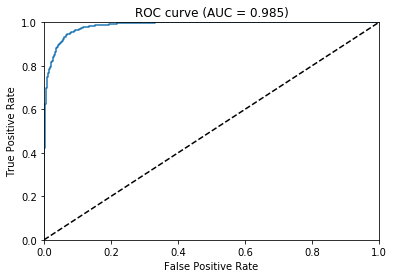

In [22]:
#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

In [23]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(testY, preds)
for i in range(0,len(recall), 15):
    print("Threshold {0}, recall = {1}, precision = {2}".format(thresholds[i], recall[i], precision[i]))

Threshold 0.00365628558211, recall = 1.0, precision = 0.660073751257
Threshold 0.00381530029699, recall = 0.998984255967, precision = 0.662735849057
Threshold 0.00410725269467, recall = 0.998984255967, precision = 0.666102268879
Threshold 0.00440591527149, recall = 0.998984255967, precision = 0.669503063308
Threshold 0.0046800696291, recall = 0.998984255967, precision = 0.672938761546
Threshold 0.00502813234925, recall = 0.998984255967, precision = 0.676409903714
Threshold 0.00543888285756, recall = 0.998984255967, precision = 0.679917041134
Threshold 0.00630022864789, recall = 0.998984255967, precision = 0.683460736623
Threshold 0.00692441919819, recall = 0.997460639919, precision = 0.685993712889
Threshold 0.0075089354068, recall = 0.997460639919, precision = 0.689606741573
Threshold 0.00787142105401, recall = 0.997460639919, precision = 0.693258030357
Threshold 0.00885096378624, recall = 0.997460639919, precision = 0.696948190206
Threshold 0.0103139588609, recall = 0.997460639919, p

AUC Score (Test): 0.976524


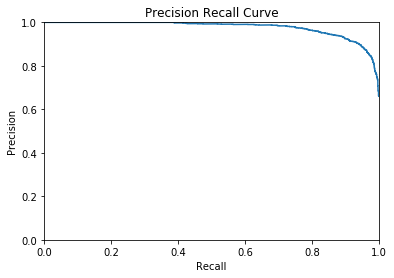

In [24]:
#draw precison recall curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall Curve')
print "AUC Score (Test): %f" % metrics.average_precision_score(testY, preds)
plt.show()

[ 0.99903071  0.9999727   0.04143012  0.99985874  0.9997254 ]
1969 3031
[ 2314.   100.    47.    40.    29.    24.    14.    24.    22.     9.
    13.    11.    13.     8.    11.     5.     6.     7.    12.     7.
     6.     6.     3.    17.     7.     9.     6.    11.     6.     7.
     6.    14.     6.     3.     6.     6.     9.     4.     5.     3.
     4.    11.    14.    14.    13.     9.    13.    18.    35.    44.]
[  6   7   8   3   3   1   0   4   3   1   3   1   2   4   0   6   2   3
   3   3   2   3   2   1   6   6   3   5   2   7   2   4   7   2   1   9
   6   6   8   7  15   8  14  14  17  30  42  52 105 756]


(0, 350)

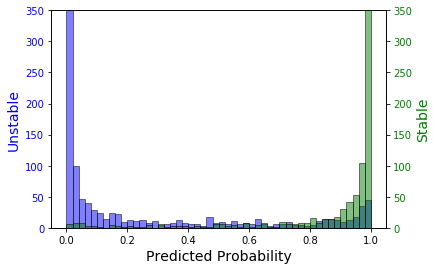

In [25]:
# Histogram:
bins = 50
Stable=preds[np.where(testY==1)]
print Stable[:5][:]
Unstable=preds[np.where(testY==0)]
print Stable.size, Unstable.size


fig, ax1 = plt.subplots()
n, bins, pathces = ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue', edgecolor = "black")
print n
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
n, bins , patches = ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green', edgecolor = "black")
print n.astype(int)
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
    
    
#ax1.set_ylim(ax2.get_ylim())
ax1.set_ylim([0,350]) # goes up to ~4300
ax2.set_ylim([0,350]) # goes up to ~2100

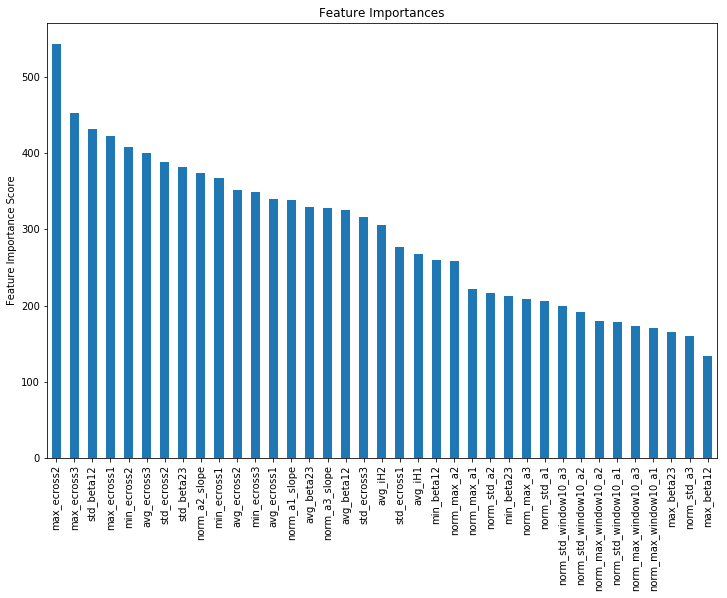

In [26]:
# feature importances
feat_imp = pd.Series(best_xgbc.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(12,8))
plt.ylabel('Feature Importance Score')
plt.show()

In [14]:
gains = bst.get_score(importance_type='gain')
total_gains = np.sum(gains.values())
#print gains.keys()
#print gains.values()/total_gains*100.
#print np.sum(gains.values()/total_gains*100.)
a = {k: v / total_gains*100. for k, v in gains.iteritems()}

In [15]:
print a

{'avg_iH2': 0.87692374002030626, 'std_ecross2': 1.4882839089064899, 'std_ecross3': 1.0148168299317517, 'norm_std_a3': 0.54976517810440728, 'norm_std_a2': 0.74018674514935412, 'norm_std_a1': 0.99868327005916901, 'max_beta23': 1.1221895142278895, 'std_beta12': 32.858571969269775, 'norm_std_window10_a1': 0.73054771826080822, 'norm_std_window10_a2': 0.61489884955028329, 'norm_std_window10_a3': 0.89702086153097527, 'avg_ecross3': 2.8130985912632132, 'avg_ecross2': 1.3798922505004456, 'avg_ecross1': 1.4180891494054624, 'avg_beta23': 0.75994495341415458, 'min_beta12': 1.2481145334277286, 'max_ecross1': 1.7249149013323317, 'max_ecross3': 2.0401254890396108, 'std_beta23': 6.1038019149038787, 'min_ecross1': 0.7171067453092288, 'norm_a3_slope': 0.97346574128306884, 'norm_a2_slope': 1.2983792462049091, 'avg_beta12': 0.84372003632729753, 'norm_max_a1': 0.87439724728813806, 'norm_max_a2': 12.85695243796739, 'norm_max_a3': 0.92095966689487385, 'max_beta12': 0.84571939712772526, 'max_ecross2': 13.5796

IGNORE THE REST, THIS IS FOR FURTHER OPTIMIZATION

#continue optimization from where we left off
#trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 200, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

best

#switch to the traditional 80 20 slipt, dont know why i did the 40 60 split before
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]



best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"], seed = 0)
params = best_xgbc.get_xgb_params()
#score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", verbose_eval=True)
#print score
d_Train = xgb.DMatrix(trainX, trainY)
d_Test = xgb.DMatrix(testX)
bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print score

#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

#continue optimization from where we left off
#trials = Trials()
#import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 200, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

print len(trials.trials)
#for i in range(200)
complete_results = [x["result"]["cv_score"] for x in trials]
print np.max(complete_results)
#print trials.trials["result"]["cv_score"]

#continue optimization from where we left off
#trials = Trials()
#import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 240, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"], seed = 0)
params = best_xgbc.get_xgb_params()

bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print score
#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

print best

In [25]:
import pickle
pickle.dump(bst, open("../../Analysis/Testing/final.pkl", "wb"))
